In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the csv created from the TMDb data (with revenue data & in MovieLens) combined with OMDb

movies = pd.read_csv('/Users/stephensinclair/Desktop/omdb_tmdb/movies_final.csv')
movies.head()

,Unnamed: 0,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj
0,0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995,4.35,773729158
1,1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995,4.35,544322577
2,2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995,4.35,168708948
3,3,tt0113041,0,Just when George Banks has recovered from his ...,76578911,106,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995,4.35,158615169
4,4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995,4.35,388231202


In [3]:
# check for null values
movies.isnull().sum()

Unnamed: 0        0
imdb_id           0
budget            0
overview         22
revenue           0
runtime           0
tagline        1460
actors            8
country           0
director          2
genre             4
title             0
writer          102
year              0
price             0
revenue_adj       0
dtype: int64

In [4]:
# 2027 movies have 0 listed for budget

movies[movies['budget']==0].shape

(2027, 16)

In [5]:
# all movies have non-zero revenue 

movies[movies['revenue']==0].shape

(0, 16)

In [6]:
#7406 movies in the dataframe with 16 features
movies.shape

(7406, 16)

In [7]:
# get an adjusted budget column
# adjusting using the same method as revenue so that the ratio remains the same

current_price = 9.01
movies['budget_adj'] = movies['budget'] * (current_price/movies['price'])
movies['budget_adj'] = movies['budget_adj'].astype(int)
movies.head()

,Unnamed: 0,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj,budget_adj
0,0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995,4.35,773729158,62137931
1,1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995,4.35,544322577,134632183
2,2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995,4.35,168708948,33140229
3,3,tt0113041,0,Just when George Banks has recovered from his ...,76578911,106,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995,4.35,158615169,0
4,4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995,4.35,388231202,124275862


In [8]:
# create a feature for the ratio of dollars grossed per dollar budgeted

movies['return_ratio'] = movies['revenue_adj'] / movies['budget_adj']

# set the values that were set as np.inf to 0

movies['return_ratio'] = movies['return_ratio'].replace(np.inf, 0)

In [ ]:
#pip install wordcloud

In [9]:
#import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [10]:
# make sure the taglines are cast as strings
movies['tagline'] = movies['tagline'].astype('str')

In [12]:
# create a string with all taglines from romantic dramedies
tag_corpus = ' '.join(movies[(movies['genre']=='Comedy, Drama, Romance')
                             &(movies['tagline'].isnull()==False)]['tagline'])

In [13]:
# add 'nan' to the list of stopwords
stop_words = ["nan"] + list(STOPWORDS)

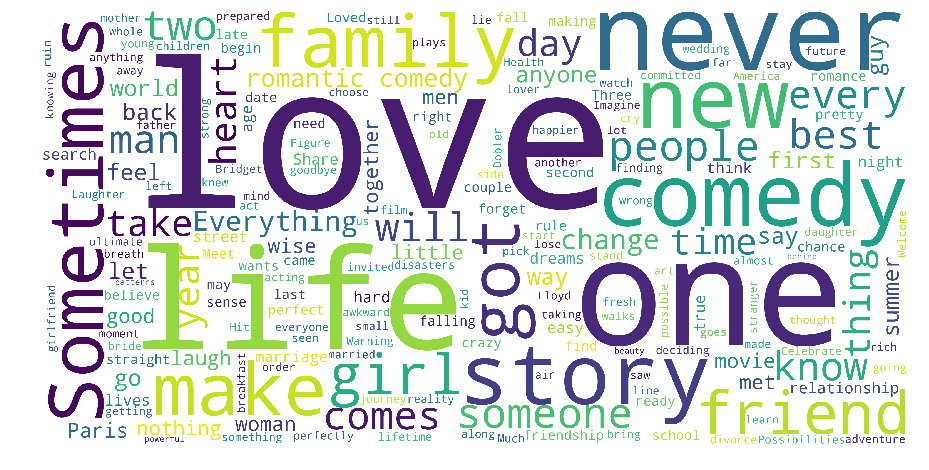

In [14]:
# wordcloud for romantic dramdey taglines
tag_wordcloud = WordCloud(stopwords=stop_words, background_color='white', height=2000, width=4000).generate(tag_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tag_wordcloud)
plt.axis('off')
plt.show()

In [15]:
# create a string with all taglines from action-adventure genre films(sci-fi and fantasy)
aas_tag_corpus = ' '.join(movies[(movies['genre']=='Action, Adventure, Sci-Fi')
                             &(movies['tagline'].isnull()==False)]['tagline'])

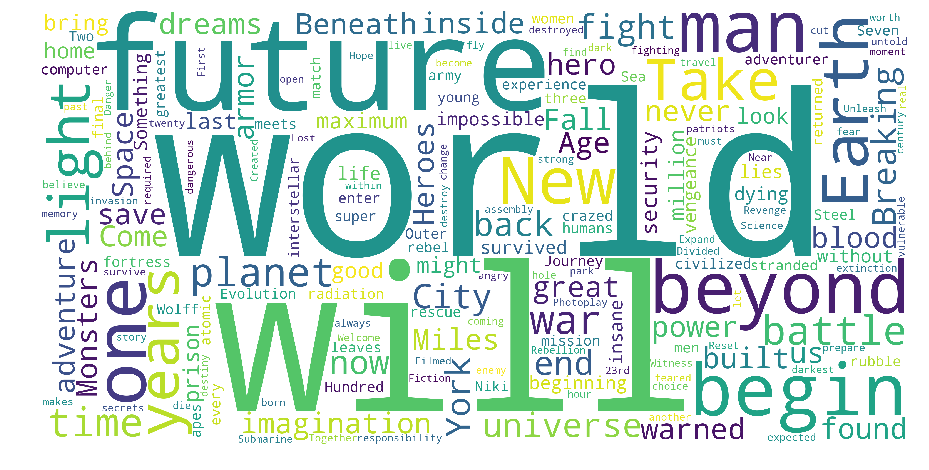

In [16]:
# wordcloud for action-adventure genre films taglines
aas_tag_wordcloud = WordCloud(stopwords=stop_words, background_color='white', 
                              height=2000, width=4000).generate(aas_tag_corpus)
plt.figure(figsize=(16,8))
plt.imshow(aas_tag_wordcloud)
plt.axis('off')
plt.show()

In [17]:
cdr = movies[movies['genre']=='Comedy, Drama, Romance']
aas = movies[movies['genre']=='Action, Adventure, Sci-Fi']
aaf = movies[movies['genre']=='Action, Adventure, Fantasy']

In [18]:
# create a table with the year and the total revenue from all movies in the genre that year

cdr_table = pd.DataFrame(pd.pivot_table(cdr, values='revenue_adj', index='year', aggfunc=np.sum)).reset_index()
cdr_table.head()

,year,revenue_adj
0,1931,493773
1,1938,267888960
2,1954,200222222
3,1960,688999998
4,1961,125365178


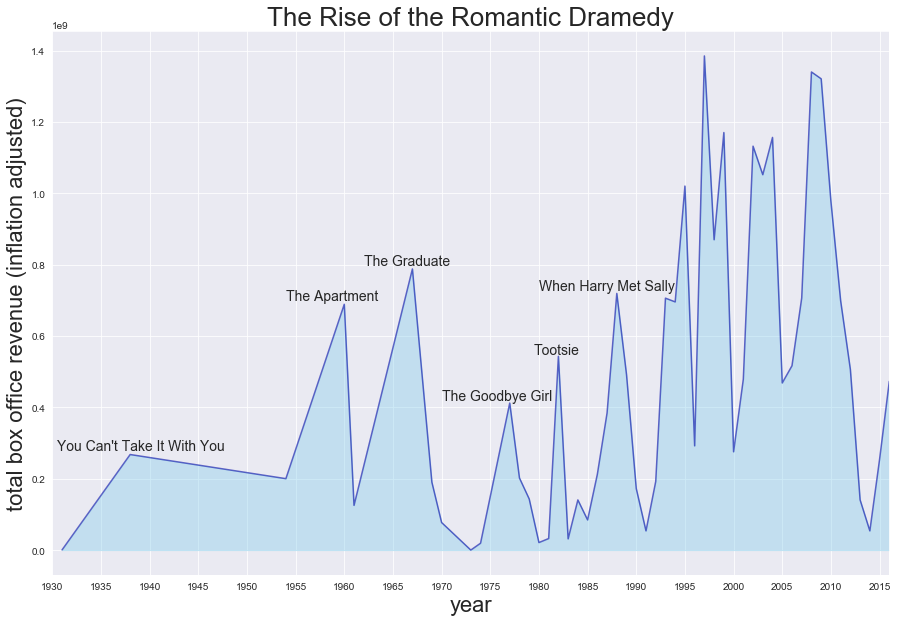

In [136]:
# plot box office revenue by year
fig, ax = plt.subplots(figsize=(15,10))
sns.set_style("darkgrid")

plt.fill_between(cdr_table['year'], cdr_table['revenue_adj'], color="skyblue", alpha=0.4)
plt.plot(cdr_table['year'], cdr_table['revenue_adj'], c='xkcd:cobalt blue', alpha=0.6)

plt.xticks(np.arange(1930, 2018, 5))
plt.xlim(1930,2016)
plt.title('The Rise of the Romantic Dramedy', fontsize=26)
plt.xlabel('year', fontsize=22)
plt.ylabel('total box office revenue (inflation adjusted)', fontsize=22)

ax.text(1930.5, 280000000, "You Can't Take It With You", fontsize=14)
ax.text(1954, 700000000, 'The Apartment', fontsize=14)
ax.text(1962, 800000000, 'The Graduate', fontsize=14)
ax.text(1970, 420000000, 'The Goodbye Girl', fontsize=14)
ax.text(1979.5, 550000000, 'Tootsie', fontsize=14)
ax.text(1980, 730000000, 'When Harry Met Sally', fontsize=14)

plt.savefig('/Users/stephensinclair/Desktop/omdb_tmdb/romantic_dramedy.png', dpi=1200)

plt.show()

In [27]:
# create a dataframe view with all action-adventure genre films
aafs = movies[(movies['genre']=='Action, Adventure, Fantasy') | (movies['genre']=='Action, Adventure, Sci-Fi') | 
             (movies['genre']=='Action, Adventure, Fantasy, Sci-Fi') | (movies['genre']=='Action, Adventure, Sci-Fi, Fantasy')]

In [28]:
# create a table with the year and the total revenue from all movies in the genre that year
aafs_table = pd.DataFrame(pd.pivot_table(aafs, values='revenue_adj', index='year', aggfunc=np.sum)).reset_index()

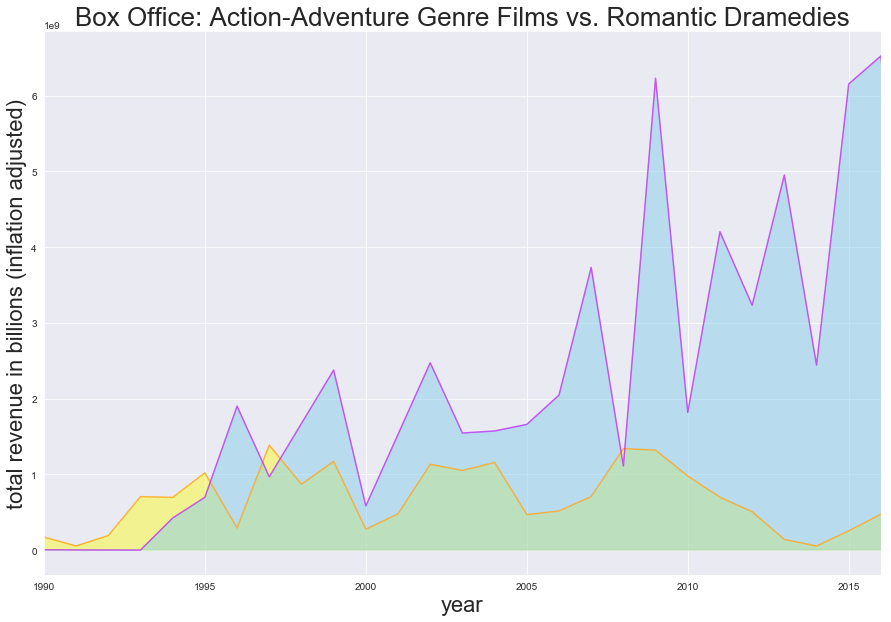

In [135]:
# plot box office revenue by year
fig, ax = plt.subplots(figsize=(15,10))
sns.set_style("darkgrid")

plt.fill_between(cdr_table['year'], cdr_table['revenue_adj'], color="yellow", alpha=0.4)
plt.plot(cdr_table['year'], cdr_table['revenue_adj'], c='xkcd:mango', alpha=0.8)

plt.fill_between(aafs_table['year'], aafs_table['revenue_adj'], color="skyblue", alpha=0.5)
plt.plot(aafs_table['year'], aafs_table['revenue_adj'], c='xkcd:hot purple', alpha=0.6)

plt.xticks(np.arange(1930, 2018, 5))
plt.xlim(1990,2016)
plt.title('Box Office: Action-Adventure Genre Films vs. Romantic Dramedies', fontsize=26)
plt.xlabel('year', fontsize=22)
plt.ylabel('total revenue in billions (inflation adjusted)', fontsize=22)
plt.savefig('/Users/stephensinclair/Desktop/omdb_tmdb/aavsrd.png', dpi=1200)

plt.show()

In [31]:
# summary statistics for inflation adjusted budgets of Romantic Dramedies

cdr[cdr['budget_adj']>0]['budget_adj'].describe()

count    2.310000e+02
mean     2.836202e+07
std      2.921908e+07
min      1.100000e+01
25%      6.105354e+06
50%      1.985067e+07
75%      3.956359e+07
max      1.370342e+08
Name: budget_adj, dtype: float64

In [32]:
# summary statistics for inflation adjusted budgets of Action-Adventure Genre Films

aafs[aafs['budget_adj']>0]['budget_adj'].describe()

count    1.180000e+02
mean     1.513370e+08
std      8.893106e+07
min      3.064625e+06
25%      7.446253e+07
50%      1.589507e+08
75%      2.080244e+08
max      4.317528e+08
Name: budget_adj, dtype: float64

In [33]:
with pd.option_context('mode.use_inf_as_null', True):
    ratio_df = movies.sort_values('return_ratio', ascending=False, na_position='last')

In [35]:
# highest return ratios w/ budget above $40,000. 
# (I assume that budgets of $12 are some sort of data entry error, 
# but that might be worth further investigation.)

ratio_df[ratio_df['budget_adj']>40000].head()

,Unnamed: 0,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj,budget_adj,return_ratio
1254,1256,tt0185937,60000,In October of 1994 three student filmmakers di...,248000000,81,The scariest movie of all time is a true story.,"Heather Donahue, Joshua Leonard, Michael C. Wi...",USA,"Daniel Myrick, Eduardo Sánchez","Horror, Mystery",The Blair Witch Project,"Daniel Myrick, Eduardo Sánchez",1999,5.08,439858267,106417,4133.345866
1658,1660,tt0074486,10000,Henry Spencer tries to survive his industrial ...,7000000,89,Where your nightmares end...,"Jack Nance, Charlotte Stewart, Allen Joseph, J...",USA,David Lynch,Horror,Eraserhead,David Lynch,1977,2.23,28282511,40403,700.010173
1979,1983,tt0068935,130000,Tang Lung arrives in Rome to help his cousins ...,85000000,100,The Colosseum . . the battleground of Bruce Le...,"Bruce Lee, Nora Miao, Chuck Norris, Ping Ou Wei",Hong Kong,Bruce Lee,"Action, Adventure, Crime, Drama, Thriller",The Way of the Dragon,Bruce Lee (screenplay),1972,1.70,450500000,689000,653.846154
1076,1078,tt0069089,12000,Notorious Baltimore criminal and underground f...,6000000,93,An exercise in poor taste.,"Divine, David Lochary, Mary Vivian Pearce, Min...",USA,John Waters,"Comedy, Crime",Pink Flamingos,John Waters,1972,1.70,31800000,63600,500.000000
3120,3134,tt0390521,65000,Morgan Spurlock subjects himself to a diet bas...,28575078,100,The first ever reality-based movie ... everyth...,"Chemeeka Walker, Dania Abu-Rmaileh, Amanda Kea...",USA,Morgan Spurlock,"Documentary, Comedy, Drama",Super Size Me,Morgan Spurlock,2004,6.21,41459171,94307,439.619233


In [37]:
# create a dataframe with non-null ratios for films with budget $40K+
aafs_ratio = aafs[(aafs['return_ratio'].isnull()==False) & 
                  (aafs['budget_adj']>40000)]

In [38]:
#summary statistics
aafs_ratio['return_ratio'].describe()

count    118.000000
mean       4.357717
std        7.884929
min        0.000594
25%        1.472990
50%        2.797241
75%        4.567508
max       70.490728
Name: return_ratio, dtype: float64

In [39]:
# create a dataframe with non-null ratios for films with budget $40K+
cdr_ratio = cdr[(cdr['return_ratio'].isnull()==False) & 
                  (cdr['budget_adj']>40000)]

In [40]:
#summary statistics
cdr_ratio['return_ratio'].describe()

count    227.000000
mean       4.403796
std        8.306025
min        0.002512
25%        0.882218
50%        1.883618
75%        4.099672
max       73.748815
Name: return_ratio, dtype: float64

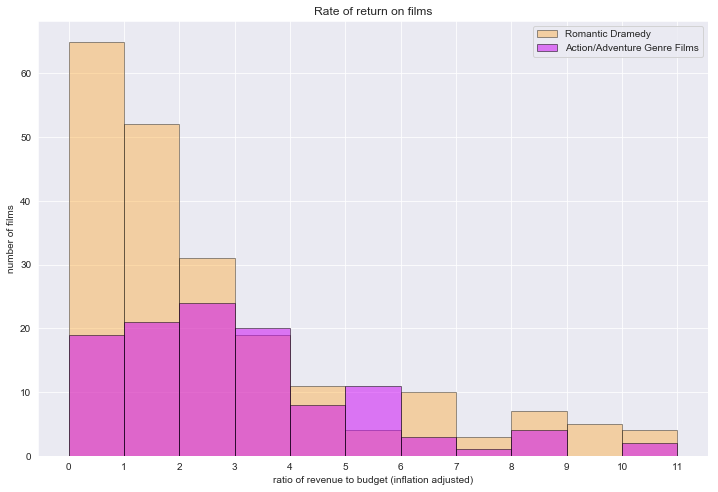

In [127]:
# number of films binned by rate of returns
bins= [num for num in range(0,12)]

plt.rcParams["figure.figsize"] = [12,8]



plt.hist(cdr_ratio['return_ratio'].values, bins=bins, edgecolor="k", 
         alpha=.4, color="xkcd:mango", label='Romantic Dramedy')
plt.hist(aafs_ratio['return_ratio'].values, bins=bins, edgecolor="k", 
         alpha=.5, color='xkcd:hot purple', label='Action/Adventure Genre Films')

plt.title('Rate of return on films')
plt.xlabel('ratio of revenue to budget (inflation adjusted)')
plt.ylabel('number of films')

plt.xticks(bins)
plt.legend(loc="upper right")
plt.show()

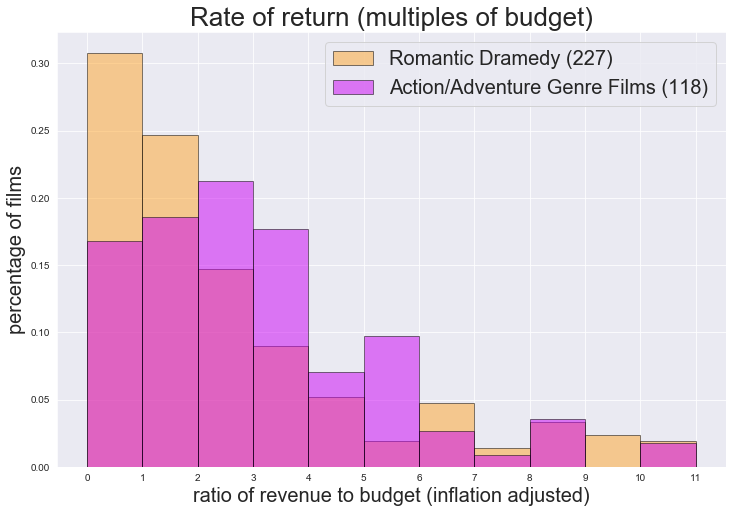

In [137]:
# percentage of films binned by rate of returns
bins= [num for num in range(0,12)]

plt.rcParams["figure.figsize"] = [12,8]



plt.hist(cdr_ratio['return_ratio'].values, bins=bins, edgecolor="k", 
         alpha=.5, color="xkcd:mango", label='Romantic Dramedy (227)', 
        density=True)
plt.hist(aafs_ratio['return_ratio'].values, bins=bins, edgecolor="k", 
         alpha=.5, color="xkcd:hot purple", label='Action/Adventure Genre Films (118)', 
        density=True)

plt.title('Rate of return (multiples of budget)', fontsize=26)
plt.xlabel('ratio of revenue to budget (inflation adjusted)', fontsize=20)
plt.ylabel('percentage of films', fontsize=20)

plt.xticks(bins)
plt.legend(loc="upper right", fontsize=20)

plt.savefig('/Users/stephensinclair/Desktop/omdb_tmdb/rate_of_return.png', dpi=1200)

plt.show()

In [47]:
# 227 films used to determine ratio of return for romantic dramedies
cdr_ratio.shape

(227, 18)

In [48]:
# 118 films used to determine ratio of return for action-adventure genre films
aafs_ratio.shape

(118, 18)

In [50]:
# make pivot table for plot
cdr_median_return = pd.DataFrame(pd.pivot_table(cdr_ratio, values='return_ratio', index='year', 
                                                aggfunc=np.median)).reset_index()

In [51]:
aafs_median_return = pd.DataFrame(pd.pivot_table(aafs_ratio, values='return_ratio', index='year', 
                                                aggfunc=np.median)).reset_index()

(1970, 2016)

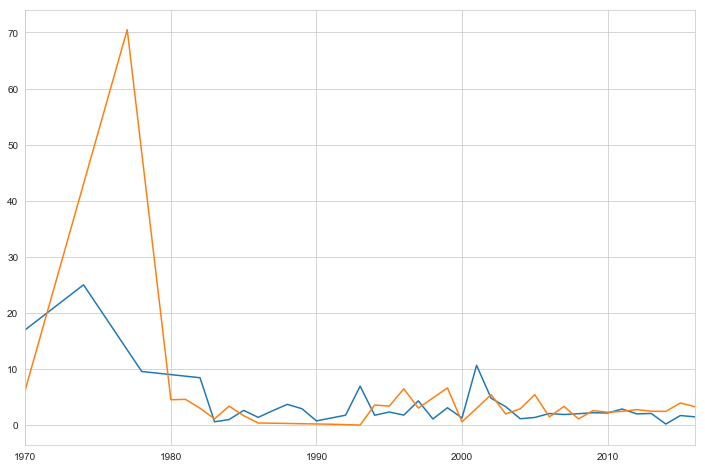

In [52]:
# plot median return of each genre by year
plt.plot(cdr_median_return['year'], cdr_median_return['return_ratio'])
plt.plot(aafs_median_return['year'], aafs_median_return['return_ratio'])

plt.xlim(1970,2016)

(0, 11)

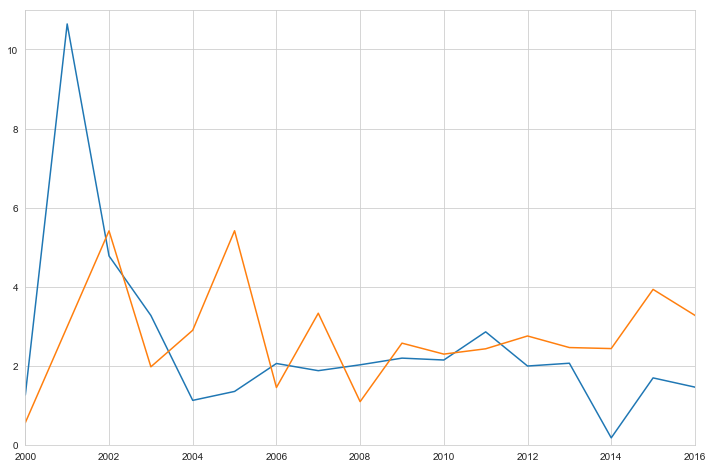

In [53]:
# median return of each genre by year zoomed in on 2000-2016
plt.plot(cdr_median_return['year'], cdr_median_return['return_ratio'])
plt.plot(aafs_median_return['year'], aafs_median_return['return_ratio'])

plt.xlim(2000,2016)
plt.ylim(0,11)

In [55]:
# make pivot tables for plot
cdr_mean_return = pd.DataFrame(pd.pivot_table(cdr_ratio, values='return_ratio', index='year', 
                                                aggfunc=np.mean)).reset_index()

In [56]:
aafs_mean_return = pd.DataFrame(pd.pivot_table(aafs_ratio, values='return_ratio', index='year', 
                                                aggfunc=np.mean)).reset_index()

(0, 16)

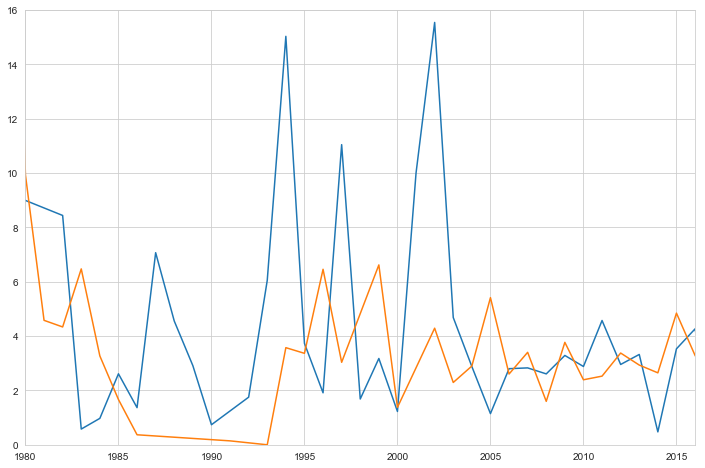

In [57]:
# plot mean return of genre by year
plt.plot(cdr_mean_return['year'], cdr_mean_return['return_ratio'])
plt.plot(aafs_mean_return['year'], aafs_mean_return['return_ratio'])

plt.xlim(1980,2016)
plt.ylim(0,16)

In [86]:
# make dataframes for plot
low = movies[(movies['budget_adj'] > 0)&(movies['budget_adj'] < 10000000)]
mid = movies[(movies['budget_adj'] >= 10000000)&(movies['budget_adj'] < 40000000)]
high = movies[(movies['budget_adj'] >= 40000000)&(movies['budget_adj'] < 100000000)]
blockbuster = movies[(movies['budget_adj'] >= 100000000)]

In [87]:
low_counts = pd.DataFrame(low['year'].value_counts()).reset_index().sort_values('index')
mid_counts = pd.DataFrame(mid['year'].value_counts()).reset_index().sort_values('index')
high_counts = pd.DataFrame(high['year'].value_counts()).reset_index().sort_values('index')
blockbuster_counts = pd.DataFrame(blockbuster['year'].value_counts()).reset_index().sort_values('index')
counts = pd.DataFrame(movies['year'].value_counts()).reset_index().sort_values('index')

(1970, 2016)

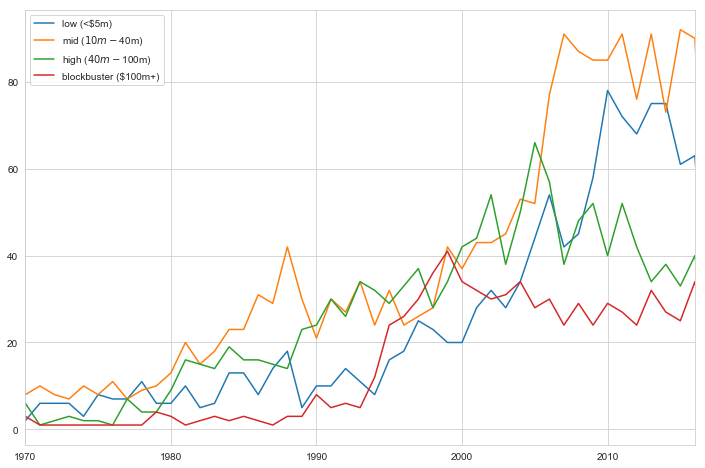

In [89]:
# check the number of movies in each budget category made each year

plt.plot(low_counts['index'], low_counts['year'], label='low (<$5m)')
plt.plot(mid_counts['index'], mid_counts['year'], label='mid ($10m-$40m)')
plt.plot(high_counts['index'], high_counts['year'], label='high ($40m-$100m)')
plt.plot(blockbuster_counts['index'], blockbuster_counts['year'], label='blockbuster ($100m+)')
plt.legend(loc="upper left")
plt.xlim(1970,2016)
#plt.ylim(18,102)

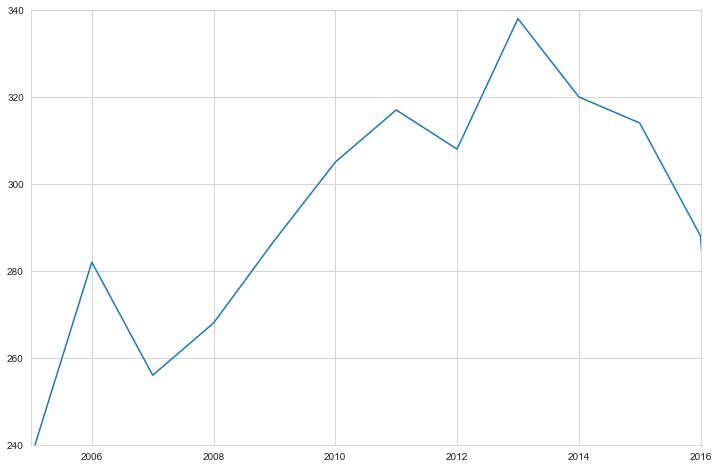

In [90]:
# overall number of movies in the dataset by year
plt.xlim(2005, 2016)
plt.plot(counts['index'], counts['year'], label='number of movies made')
plt.ylim(240,340)
plt.show()

In [70]:
# summary statistics for romantic dramedy budgets
cdr[cdr['budget']>40000]['budget'].describe()

count    2.270000e+02
mean     1.881382e+07
std      2.020355e+07
min      6.500000e+04
25%      4.090000e+06
50%      1.300000e+07
75%      2.617500e+07
max      1.200000e+08
Name: budget, dtype: float64